In [127]:
Sys.Date()

[1] "2020-02-10"

In [128]:
libraries = c("dplyr","magrittr","tidyr","ggplot2","gridExtra","RColorBrewer","zoo","scales","colorspace","readxl")
for(x in libraries) { library(x,character.only=TRUE,warn.conflicts=FALSE) }

'%&%' = function(x,y) paste0(x,y)

theme_set(theme_classic(base_size=12, base_family="sans"))

In [129]:
number_of_scenario = 1

read.csv("../../results/Scenario-"%&%number_of_scenario%&%"/incidence-final.csv") -> dt_table
dt_table %>% 
    filter(var == c('Incidence')) %>% 
    mutate(cal = (as.Date('2019-12-08')+time)) -> dt.inci
read.csv("../../scripts/Sungmok/CHN.inci.csv") %>% 
    as.data.frame %>% do(na.locf(.)) %>%
    mutate(cal = (as.Date('2019-12-08')+time)) -> dt.CHN.inci

dt.inci %>% filter(cal >= as.Date('2019-12-31')) -> dt.inci.1
dt.CHN.inci %>% filter(cal >= as.Date('2019-12-31')) -> dt.CHN.inci.1

read.csv("../../data/data.csv") -> dt_table2

# dt_table2 %<>% filter(time <= 48)
dt_table2 %>% gather(time, source, exports, deaths) -> dt.fig2
colnames(dt.fig2) <- c("cal", "x", "y", "z","pop","source","value")
dt.fig2 %<>% dplyr::select(cal, source, value)
dt.fig2$cal <- as.Date(dt.fig2$cal)

### CFR 
dt_table %>% filter(var == c('CFR')) %>%
    mutate(cal = (as.Date('2020-01-09')+time-1)) -> dt.cfr

#### making upper bound for CFR with zero case
dt.cfr[1:9,] -> dt.cfr.temp
dt.cfr.temp %>% mutate(time.temp = 0:8) %>%  mutate(cal = (as.Date('2019-12-31')+time)) -> dt.cfr.temp

dt.inci %>% filter(time<=9) -> dt.inci.temp
dt.inci.temp %<>% select(time, mean) %>% rename(inci = mean)

merge(dt.cfr.temp, dt.inci.temp, by = c('time')) %>%
    mutate(lower = NA, upper = NA, mean = NA) %>% select(-inci, -time.temp) %>% 
    select(var, time, mean, lower, upper, cal)-> dt.cfr.temp

rbind(dt.cfr.temp, dt.cfr) -> dt.cfr 

In [130]:
print(dt.inci.1)

         var time      mean     lower     upper        cal
1  Incidence   23  194.0310  168.0010  219.6313 2019-12-31
2  Incidence   24  225.9202  194.0741  257.4065 2020-01-01
3  Incidence   25  262.8771  224.0272  301.4926 2020-01-02
4  Incidence   26  305.7078  258.4377  352.9443 2020-01-03
5  Incidence   27  355.3466  297.9689  412.9919 2020-01-04
6  Incidence   28  412.8766  343.3827  483.0717 2020-01-05
7  Incidence   29  479.5533  395.5547  564.8597 2020-01-06
8  Incidence   30  556.8322  455.4904  660.3120 2020-01-07
9  Incidence   31  646.4005  524.3452  771.7114 2020-01-08
10 Incidence   32  750.2143  603.4464  901.7224 2020-01-09
11 Incidence   33  870.5410  694.3188 1053.4541 2020-01-10
12 Incidence   34 1010.0094  798.7141 1230.5357 2020-01-11
13 Incidence   35 1171.6671  918.6445 1437.2022 2020-01-12
14 Incidence   36 1359.0474 1056.4219 1678.3964 2020-01-13
15 Incidence   37 1576.2465 1214.7022 1959.8868 2020-01-14
16 Incidence   38 1828.0136 1396.5364 2288.4058 2020-01-

Warning message in pal_name(palette, type):
“Unknown palette Dark1”


   var time     mean    lower    upper        cal mean.p lower.p upper.p
1  CFR    1       NA       NA       NA 2020-01-01     NA      NA      NA
2  CFR    2       NA       NA       NA 2020-01-02     NA      NA      NA
3  CFR    3       NA       NA       NA 2020-01-03     NA      NA      NA
4  CFR    4       NA       NA       NA 2020-01-04     NA      NA      NA
5  CFR    5       NA       NA       NA 2020-01-05     NA      NA      NA
6  CFR    6       NA       NA       NA 2020-01-06     NA      NA      NA
7  CFR    7       NA       NA       NA 2020-01-07     NA      NA      NA
8  CFR    8       NA       NA       NA 2020-01-08     NA      NA      NA
9  CFR    9       NA       NA       NA 2020-01-09     NA      NA      NA
10 CFR    1 0.016721 0.001637 0.042490 2020-01-09 1.6721  0.1637  4.2490
11 CFR    2 0.014388 0.001372 0.036651 2020-01-10 1.4388  0.1372  3.6651
12 CFR    3 0.012573 0.001208 0.032433 2020-01-11 1.2573  0.1208  3.2433
13 CFR    4 0.010836 0.001050 0.027598 2020-01-12 1

Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 10 rows containing missing values (geom_errorbar).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”


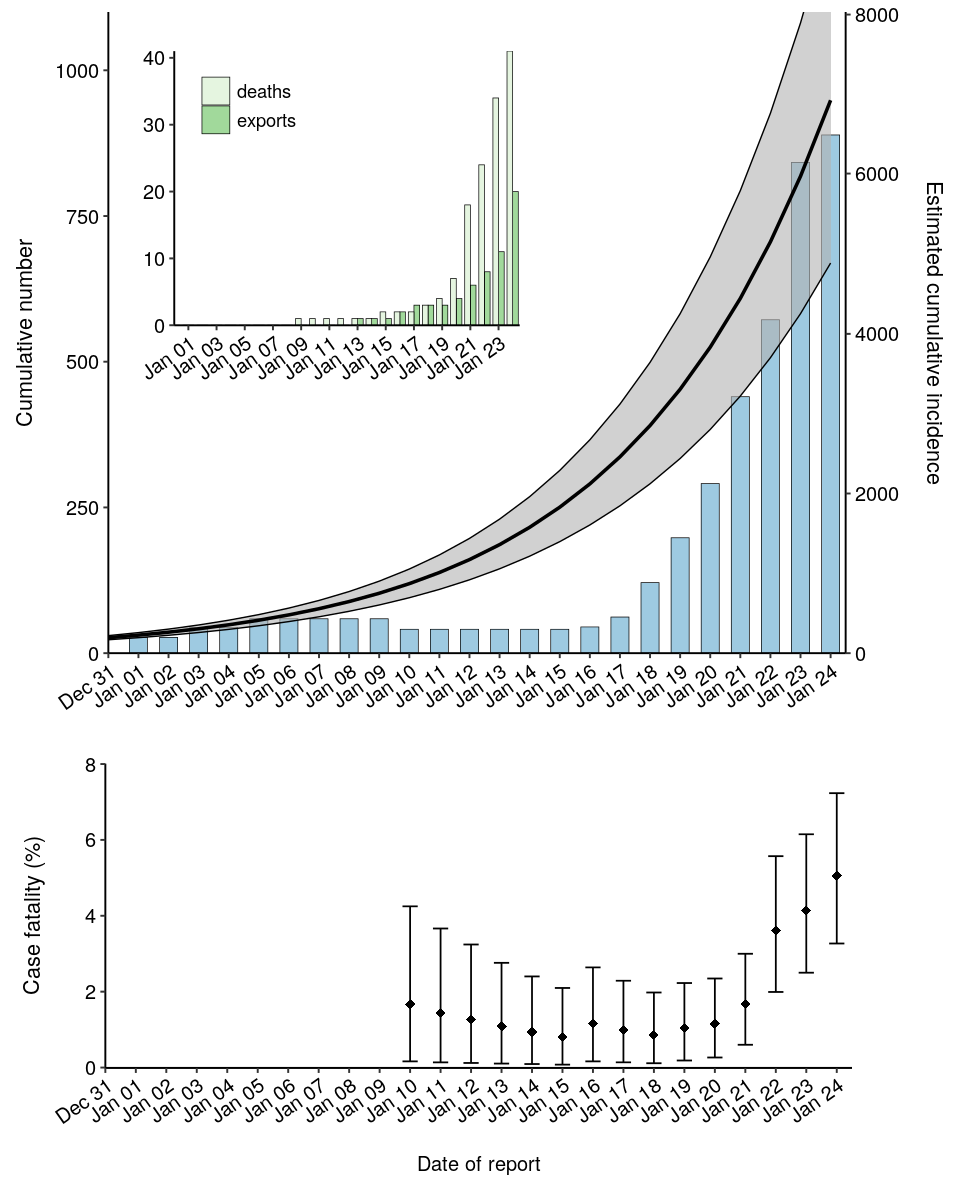

In [131]:
cs = c(8, 10)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])
fnt_size = 12

scaling_parameter = .137

dt.CHN.inci.1 %>%
    ggplot(aes(x=cal, y=inci)) +
    geom_bar(stat='identity', width = .6, color='black', size=.2, 
             fill=RColorBrewer::brewer.pal(9, "Blues")[4]) +
    geom_ribbon(data=dt.inci.1, aes(x=cal, ymin = dt.inci.1$lower*scaling_parameter, 
                                    ymax = dt.inci.1$upper*scaling_parameter), 
                alpha = 0.6, fill="grey70", inherit.aes=FALSE) +
    geom_line(data=dt.inci.1, aes(y=dt.inci.1$lower*scaling_parameter), color="black", size=.4) +
    geom_line(data=dt.inci.1, aes(y=dt.inci.1$upper*scaling_parameter), color="black", size=.4) +
    geom_line(data=dt.inci.1, aes(y=mean*scaling_parameter), color="black", size=1) +
    scale_y_continuous(expand=c(.0,0),
                       sec.axis = sec_axis(~./scaling_parameter, 
                                           name = "Estimated cumulative incidence\n")) +
    xlab("") + ylab("Cumulative number\n") +
    theme(plot.margin = unit(c(.5,.5,1,.25),"lines"),
          text = element_text(family="sans",color="black"),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.title.y = element_text(vjust = -1, size=fnt_size+1),
          axis.text =element_text(size=fnt_size, family="sans",color="black"),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank()) + 
    coord_cartesian(ylim = c(0,1100)) +  
    scale_x_date(expand=c(0,0), date_labels="%b %d",date_breaks  ="1 day",
                 limits=c(as.Date('2019-12-31'),as.Date('2020-01-24')+.5)) -> fig11

dt.fig2 %>% filter(cal >= as.Date('2019-12-31')) %>%
    ggplot(aes(x=cal, y=value, fill=source)) + 
    geom_bar(stat="identity", width = .8, position='dodge', color='black', size=.2) +
    guides(color=F) +
    xlab("") + ylab("") +
    theme(text = element_text(family="sans",color="black",size=fnt_size),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.text = element_text(size=fnt_size, family="sans",color="black"),
          legend.position = c(0.22, 0.82),
          legend.title=element_blank(),
          legend.text = element_text(size = 11, family="sans"),
          legend.spacing.x = unit(0.15, 'cm')
    ) + 
    scale_x_date(expand=c(0,0), date_labels="%b %d",date_breaks  ="2 day",
                 limits=c(as.Date('2019-12-31'),as.Date('2020-01-24')+.5)) +
    scale_y_continuous(expand=c(0,.01)) +
    scale_fill_brewer(palette = "Dark1") +
    expand_limits(y = 0:35) -> fig12

dt.cfr %>% mutate(mean.p = mean *100, lower.p = lower*100, upper.p = upper*100) %>% mutate(cal=cal+0.5) %T>% print %>% 
ggplot(aes(x=cal+.5, y=mean.p)) + 
    geom_errorbar(aes(ymin=lower.p, ymax=upper.p), colour="black", width=0.5, size=0.5) +
    geom_point(size=2.5, shape=18) +
    xlab("\nDate of report") + ylab("Case fatality (%)\n") +
    theme(plot.margin = unit(c(0,4.5,1,1.5),"lines"),
          text = element_text(family="sans",color="black",size=fnt_size),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.title.y = element_text(vjust = 3.5, size=fnt_size+1),
          axis.text =element_text(size=fnt_size, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    scale_x_date(expand=c(0,0), date_labels="%b %d",date_breaks  ="1 day",
                 limits=c(as.Date('2019-12-31'),as.Date('2020-01-24')+.5)) +
    coord_cartesian(ylim = c(0,8)) +
    scale_y_continuous(expand=c(0,.01)) -> fig13

fig123 = fig11 + 
    annotation_custom(grob = ggplotGrob(
        fig12 + theme(plot.background = element_rect(colour = "white"))), 
        xmin = as.numeric(as.Date('2019-12-31')), xmax = as.numeric(as.Date('2020-01-14')), 
        ymin = 400, ymax = 1050)

pFinal = grid.arrange(fig123, fig13, heights=c(1.75,1), nrow=2, ncol=1)

ggsave(plot=pFinal, width=cs[1],height=cs[2],filename="../../figures/draft/fig1-scen"%&%number_of_scenario%&%".pdf",useDingbats=FALSE)

  var time     mean    lower    upper
1   r   NA 0.147104 0.138728 0.154496
           T     mean    lower    upper
1   4.100000 1.603126 1.568785 1.633434
2   4.383333 1.644806 1.608091 1.677207
3   4.666667 1.686485 1.647397 1.720981
4   4.950000 1.728165 1.686704 1.764755
5   5.233333 1.769844 1.726010 1.808529
6   5.516667 1.811524 1.765316 1.852303
7   5.800000 1.853203 1.804622 1.896077
8   6.083333 1.894883 1.843929 1.939851
9   6.366667 1.936562 1.883235 1.983625
10  6.650000 1.978242 1.922541 2.027398
11  6.933333 2.019921 1.961847 2.071172
12  7.216667 2.061601 2.001154 2.114946
13  7.500000 2.103280 2.040460 2.158720
14  7.783333 2.144959 2.079766 2.202494
15  8.066667 2.186639 2.119073 2.246268
16  8.350000 2.228318 2.158379 2.290042
17  8.633333 2.269998 2.197685 2.333815
18  8.916667 2.311677 2.236991 2.377589
19  9.200000 2.353357 2.276298 2.421363
20  9.483333 2.395036 2.315604 2.465137
21  9.766667 2.436716 2.354910 2.508911
22 10.050000 2.478395 2.394216 2.552685
23 1

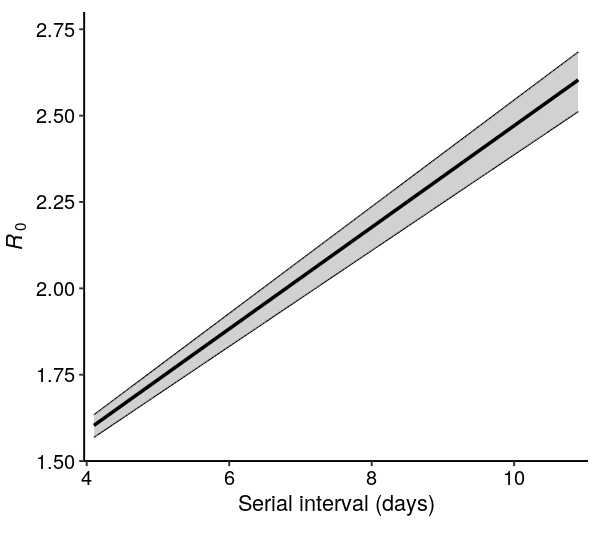

In [132]:
cs = c(5, 4.5)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

r = dt_table[dt_table$var=='r',]
print(r)

data.frame(T = seq(4.1,10.9,length.out=25)) %>% mutate(mean = 1+r$mean*T, lower = 1+r$lower*T, upper = 1+r$upper*T) %T>% print %>% 
    ggplot(aes(x=T)) +
    geom_line(aes(y=lower), color="black", size=.4) +
    geom_line(aes(y=upper), color="black", size=.4) +
    geom_ribbon(aes(x=T, ymin = lower, ymax = upper), alpha = 0.6, fill="grey70", inherit.aes=FALSE) +
    geom_line(aes(y=mean), color="black", size=1) +
    xlab("Serial interval (days)") + ylab(expression(italic(R)[0])) +
    coord_cartesian(ylim = c(1.5,2.8)) +
    scale_x_continuous(expand=c(0.02,0)) + scale_y_continuous(expand=c(0,0)) +
    theme(plot.margin = unit(c(.5,.5,1,.25),"lines"),
          text = element_text(family="sans",color="black"),
          axis.text = element_text(size=fnt_size, family="sans",color="black"),
          panel.grid.major = element_blank(), 
          axis.title = element_text(size=fnt_size+1),
          panel.grid.minor = element_blank()) -> fig31

fig31

ggsave(plot=fig31, width=cs[1], height=cs[2],filename="../../figures/draft/fig31.pdf",useDingbats=FALSE)

In [133]:
number_of_scenario = 2

read.csv("../../results/Scenario-"%&%number_of_scenario%&%"/incidence-final.csv") -> dt_table
dt_table %>% 
    filter(var == c('Incidence')) %>% 
    mutate(cal = (as.Date('2019-12-08')+time)) -> dt.inci
read.csv("../../scripts/Sungmok/CHN.inci.csv") %>% 
    as.data.frame %>% do(na.locf(.)) %>%
    mutate(cal = (as.Date('2019-12-08')+time)) -> dt.CHN.inci

dt.inci %>% filter(cal >= as.Date('2019-12-31')) -> dt.inci.1
dt.CHN.inci %>% filter(cal >= as.Date('2019-12-31')) -> dt.CHN.inci.1

read.csv("../../data/data.csv") -> dt_table2

# dt_table2 %<>% filter(time <= 48)
dt_table2 %>% gather(time, source, exports, deaths) -> dt.fig2
colnames(dt.fig2) <- c("cal", "x", "y", "z","pop","source","value")
dt.fig2 %<>% dplyr::select(cal, source, value)
dt.fig2$cal <- as.Date(dt.fig2$cal)

### CFR 
dt_table %>% filter(var == c('CFR')) %>%
    mutate(cal = (as.Date('2020-01-09')+time-1)) -> dt.cfr

#### making upper bound for CFR with zero case
dt.cfr[1:9,] -> dt.cfr.temp
dt.cfr.temp %>% mutate(time.temp = 0:8) %>%  mutate(cal = (as.Date('2019-12-31')+time)) -> dt.cfr.temp

dt.inci %>% filter(time<=9) -> dt.inci.temp
dt.inci.temp %<>% select(time, mean) %>% rename(inci = mean)

merge(dt.cfr.temp, dt.inci.temp, by = c('time')) %>%
    mutate(lower = NA, upper = NA, mean = NA) %>% select(-inci, -time.temp) %>% 
    select(var, time, mean, lower, upper, cal)-> dt.cfr.temp

rbind(dt.cfr.temp, dt.cfr) -> dt.cfr 

In [134]:
print(dt.inci.1)

         var time        mean        lower       upper        cal
1  Incidence   23    20.68192     5.038167    57.15738 2019-12-31
2  Incidence   24    27.13249     7.209335    71.52963 2020-01-01
3  Incidence   25    35.63293    10.311766    89.42382 2020-01-02
4  Incidence   26    46.84809    14.749453   111.80711 2020-01-03
5  Incidence   27    61.66271    21.114302   139.99676 2020-01-04
6  Incidence   28    81.25550    30.165258   175.32008 2020-01-05
7  Incidence   29   107.19864    43.003325   219.47026 2020-01-06
8  Incidence   30   141.59158    61.405352   275.19811 2020-01-07
9  Incidence   31   187.24108    87.702382   345.02191 2020-01-08
10 Incidence   32   247.90392   125.109228   431.74650 2020-01-09
11 Incidence   33   328.61419   177.636420   543.28233 2020-01-10
12 Incidence   34   436.12548   252.384028   683.93288 2020-01-11
13 Incidence   35   579.50865   358.265928   861.83681 2020-01-12
14 Incidence   36   770.96098   507.779050  1091.10495 2020-01-13
15 Inciden

Warning message in pal_name(palette, type):
“Unknown palette Dark1”


   var time     mean    lower    upper        cal  mean.p lower.p upper.p
1  CFR    1       NA       NA       NA 2020-01-01      NA      NA      NA
2  CFR    2       NA       NA       NA 2020-01-02      NA      NA      NA
3  CFR    3       NA       NA       NA 2020-01-03      NA      NA      NA
4  CFR    4       NA       NA       NA 2020-01-04      NA      NA      NA
5  CFR    5       NA       NA       NA 2020-01-05      NA      NA      NA
6  CFR    6       NA       NA       NA 2020-01-06      NA      NA      NA
7  CFR    7       NA       NA       NA 2020-01-07      NA      NA      NA
8  CFR    8       NA       NA       NA 2020-01-08      NA      NA      NA
9  CFR    9       NA       NA       NA 2020-01-09      NA      NA      NA
10 CFR    1 0.185157 0.012113 0.575158 2020-01-09 18.5157  1.2113 57.5158
11 CFR    2 0.149815 0.009626 0.461537 2020-01-10 14.9815  0.9626 46.1537
12 CFR    3 0.118237 0.008114 0.374887 2020-01-11 11.8237  0.8114 37.4887
13 CFR    4 0.092178 0.006819 0.294567

Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 10 rows containing missing values (geom_errorbar).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”


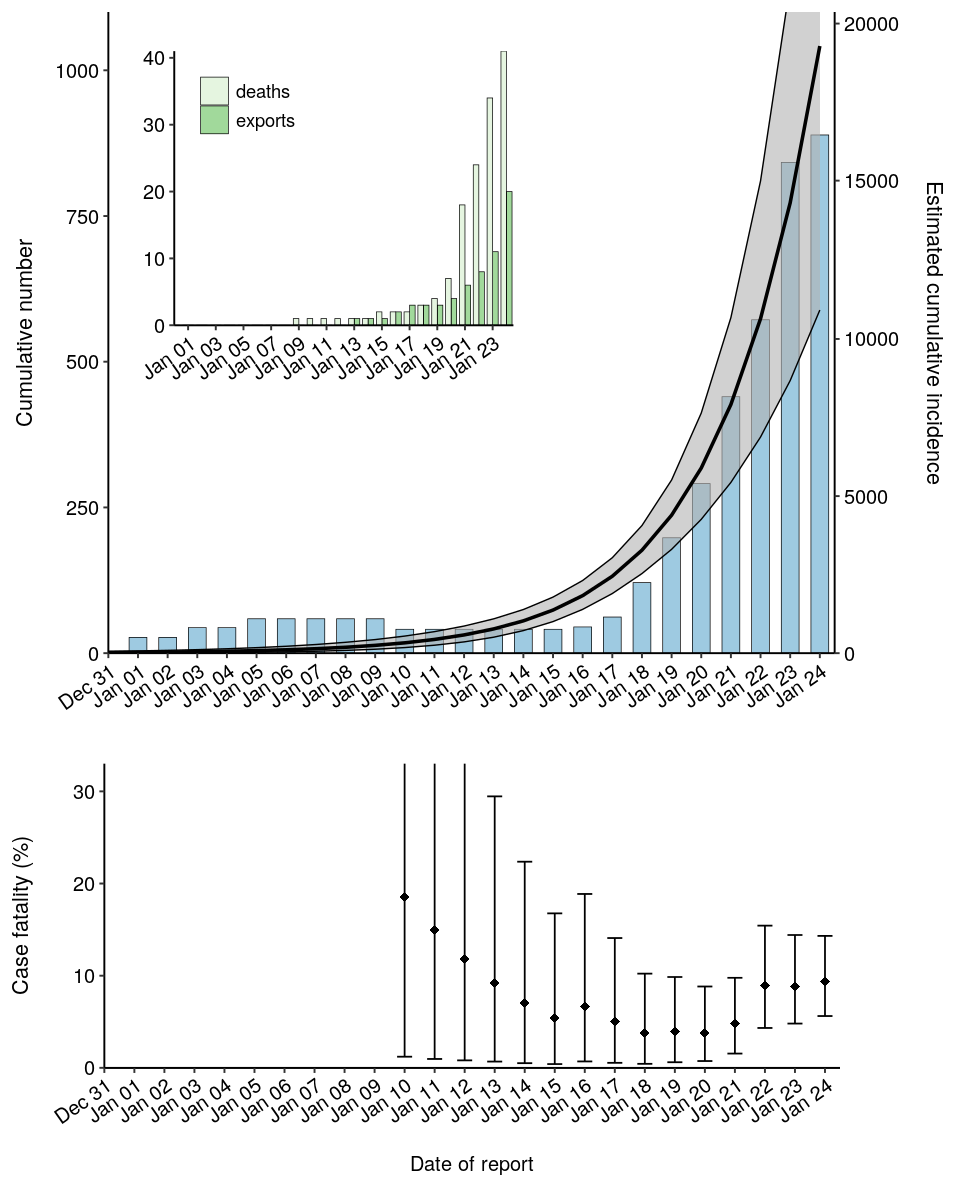

In [135]:
cs = c(8, 10)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

scaling_parameter = .054

dt.CHN.inci.1 %>%
    ggplot(aes(x=cal, y=inci)) +
    geom_bar(stat='identity', width = .6, color='black', size=.2, 
             fill=RColorBrewer::brewer.pal(9, "Blues")[4]) +
    geom_ribbon(data=dt.inci.1, aes(x=cal, ymin = dt.inci.1$lower*scaling_parameter, 
                                    ymax = dt.inci.1$upper*scaling_parameter), 
                alpha = 0.6, fill="grey70", inherit.aes=FALSE) +
    geom_line(data=dt.inci.1, aes(y=dt.inci.1$lower*scaling_parameter), color="black", size=.4) +
    geom_line(data=dt.inci.1, aes(y=dt.inci.1$upper*scaling_parameter), color="black", size=.4) +
    geom_line(data=dt.inci.1, aes(y=mean*scaling_parameter), color="black", size=1) +
    scale_y_continuous(expand=c(.0,0),
                       sec.axis = sec_axis(~./scaling_parameter, 
                                           name = "Estimated cumulative incidence\n")) +
    xlab("") + ylab("Cumulative number\n") +
    theme(plot.margin = unit(c(.5,.5,1,.25),"lines"),
          text = element_text(family="sans",color="black"),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.title.y = element_text(vjust = -1, size=fnt_size+1),
          axis.text =element_text(size=fnt_size, family="sans",color="black"),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank()) + 
    coord_cartesian(ylim = c(0,1100)) +  
    scale_x_date(expand=c(0,0), date_labels="%b %d",date_breaks  ="1 day",
                 limits=c(as.Date('2019-12-31'),as.Date('2020-01-24')+.5)) -> fig11

dt.fig2 %>% filter(cal >= as.Date('2019-12-31')) %>%
    ggplot(aes(x=cal, y=value, fill=source)) + 
    geom_bar(stat="identity", width = .8, position='dodge', color='black', size=.2) +
    guides(color=F) +
    xlab("") + ylab("") +
    theme(text = element_text(family="sans",color="black",size=fnt_size),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.text = element_text(size=fnt_size, family="sans",color="black"),
          legend.position = c(0.22, 0.82),
          legend.title=element_blank(),
          legend.text = element_text(size = 11, family="sans"),
          legend.spacing.x = unit(0.15, 'cm')
    ) + 
    scale_x_date(expand=c(0,0), date_labels="%b %d",date_breaks  ="2 day",
                 limits=c(as.Date('2019-12-31'),as.Date('2020-01-24')+.5)) +
    scale_y_continuous(expand=c(0,.01)) +
    scale_fill_brewer(palette = "Dark1") +
    expand_limits(y = 0:35) -> fig12

dt.cfr %>% mutate(mean.p = mean *100, lower.p = lower*100, upper.p = upper*100) %>% mutate(cal=cal+0.5) %T>% print %>% 
ggplot(aes(x=cal+.5, y=mean.p)) + 
    geom_errorbar(aes(ymin=lower.p, ymax=upper.p), colour="black", width=0.5, size=0.5) +
    geom_point(size=2.5, shape=18) +
    xlab("\nDate of report") + ylab("Case fatality (%)\n") +
    theme(plot.margin = unit(c(0,5,1,1),"lines"),
          text = element_text(family="sans",color="black",size=fnt_size),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.title.y = element_text(vjust = 3.5, size=fnt_size+1),
          axis.text =element_text(size=fnt_size, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    scale_x_date(expand=c(0,0), date_labels="%b %d",date_breaks  ="1 day",
                 limits=c(as.Date('2019-12-31'),as.Date('2020-01-24')+.5)) +
    coord_cartesian(ylim = c(0,33)) +
    scale_y_continuous(expand=c(0,.01)) -> fig13


fig123 = fig11 + 
    annotation_custom(grob = ggplotGrob(
        fig12 + theme(plot.background = element_rect(colour = "white"))), 
        xmin = as.numeric(as.Date('2019-12-31')), xmax = as.numeric(as.Date('2020-01-14')), 
        ymin = 400, ymax = 1050)

pFinal = grid.arrange(fig123, fig13, heights=c(1.75,1), nrow=2, ncol=1)

ggsave(plot=pFinal, width=cs[1],height=cs[2],filename="../../figures/draft/fig1-scen2.pdf",useDingbats=FALSE)

  var time     mean    lower    upper
1   r   NA 0.291416 0.221776 0.359277
           T     mean    lower    upper
1   4.100000 2.194806 1.909282 2.473036
2   4.383333 2.277373 1.972118 2.574831
3   4.666667 2.359941 2.034955 2.676626
4   4.950000 2.442509 2.097791 2.778421
5   5.233333 2.525077 2.160628 2.880216
6   5.516667 2.607645 2.223464 2.982011
7   5.800000 2.690213 2.286301 3.083807
8   6.083333 2.772781 2.349137 3.185602
9   6.366667 2.855349 2.411974 3.287397
10  6.650000 2.937916 2.474810 3.389192
11  6.933333 3.020484 2.537647 3.490987
12  7.216667 3.103052 2.600483 3.592782
13  7.500000 3.185620 2.663320 3.694578
14  7.783333 3.268188 2.726157 3.796373
15  8.066667 3.350756 2.788993 3.898168
16  8.350000 3.433324 2.851830 3.999963
17  8.633333 3.515891 2.914666 4.101758
18  8.916667 3.598459 2.977503 4.203553
19  9.200000 3.681027 3.040339 4.305348
20  9.483333 3.763595 3.103176 4.407144
21  9.766667 3.846163 3.166012 4.508939
22 10.050000 3.928731 3.228849 4.610734
23 1

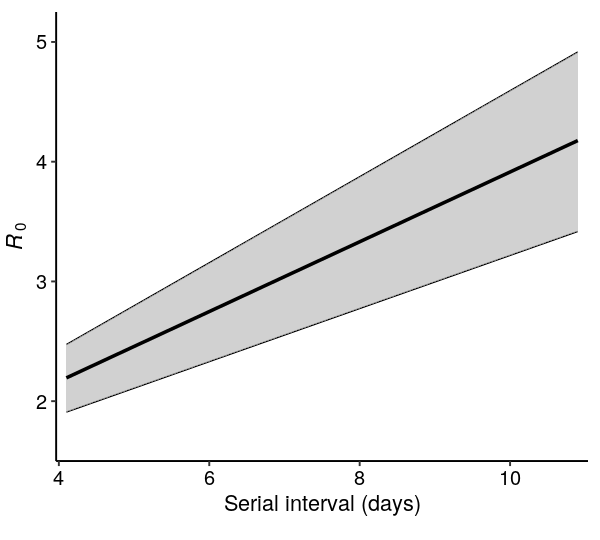

In [136]:
cs = c(5, 4.5)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

r = dt_table[dt_table$var=='r',]
R0 = function(T) 1+r*T
print(r)

data.frame(T = seq(4.1,10.9,length.out=25)) %>% mutate(mean = 1+r$mean*T, lower = 1+r$lower*T, upper = 1+r$upper*T) %T>% print %>% 
    ggplot(aes(x=T)) +
    geom_line(aes(y=lower), color="black", size=.4) +
    geom_line(aes(y=upper), color="black", size=.4) +
    geom_ribbon(aes(x=T, ymin = lower, ymax = upper), alpha = 0.6, fill="grey70", inherit.aes=FALSE) +
    geom_line(aes(y=mean), color="black", size=1) +
    xlab("Serial interval (days)") + ylab(expression(italic(R)[0])) +
    coord_cartesian(ylim = c(1.5,5.25)) +
    scale_x_continuous(expand=c(0.02,0)) + scale_y_continuous(expand=c(0,0)) +
    theme(plot.margin = unit(c(.5,.5,1,.25),"lines"),
          text = element_text(family="sans",color="black"),
          axis.text = element_text(size=fnt_size, family="sans",color="black"),
          axis.title = element_text(size=fnt_size+1),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank()) -> fig32

fig32

ggsave(plot=fig32, width=cs[1], height=cs[2],filename="../../figures/draft/fig32.pdf",useDingbats=FALSE)